# Diamond Dataset

Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

In [1]:
# Loading Library:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset:

data = pd.read_csv('diamond_data.csv')
data.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


# Preprocessing

In [8]:
num_data = data.select_dtypes(include = np.number)
num_data.describe()

,carat,depth,table,price,x,y,z
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,0.791325,61.762185,57.445184,3938.685844,5.713594,5.714460,3.528203
std,0.475814,1.439904,2.235772,4117.039798,1.126730,1.116477,0.693149
min,0.230000,54.600000,52.000000,327.000000,3.860000,3.880000,2.310000
25%,0.400000,61.100000,56.000000,918.000000,4.705000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,2301.000000,5.640000,5.660000,3.500000
75%,1.035000,62.500000,59.000000,5188.000000,6.535000,6.520000,4.030000
max,2.660000,71.800000,70.000000,18803.000000,9.080000,9.010000,5.540000


In [9]:
cat_data = data.select_dtypes(exclude = np.number)
cat_data.describe()

,cut,color
count,1547,1547
unique,5,7
top,Ideal,G
freq,611,317


In [3]:
# to check the datatype of diamond dataset:

data.dtypes

carat    float64
cut       object
color     object
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [4]:
data.isnull().sum() / len(data)

carat    0.0
cut      0.0
color    0.0
depth    0.0
table    0.0
price    0.0
x        0.0
y        0.0
z        0.0
dtype: float64

In [5]:
for i in data.columns:
    print(data[i].value_counts())

0.30    80
1.01    68
0.31    62
0.70    59
0.32    56
        ..
0.84     1
2.40     1
2.26     1
2.55     1
0.66     1
Name: carat, Length: 168, dtype: int64
Ideal        611
Premium      389
Very Good    358
Good         148
Fair          41
Name: cut, dtype: int64
G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64
61.6    74
62.1    62
62.0    61
61.9    59
62.3    57
        ..
56.9     1
54.6     1
64.9     1
66.9     1
64.7     1
Name: depth, Length: 94, dtype: int64
57.0    281
56.0    275
58.0    236
55.0    189
59.0    188
60.0    125
54.0     68
61.0     64
62.0     36
53.0     18
63.0     17
64.0      8
65.0      5
52.0      4
55.6      2
66.0      2
55.9      2
54.1      2
54.2      2
60.3      1
62.5      1
54.7      1
60.2      1
55.3      1
58.9      1
56.4      1
54.3      1
53.6      1
57.5      1
55.4      1
57.8      1
60.1      1
70.0      1
68.0      1
54.4      1
53.8      1
53.2      1
53.9      1
56.7      1
59.4      1
55.

In [6]:
# Infernce: there is no null values or anyother special characters in the dataset.

In [12]:
# To Process the dataset in machine learning model encode categorical column:
data['cut'].value_counts()

Ideal        611
Premium      389
Very Good    358
Good         148
Fair          41
Name: cut, dtype: int64

In [13]:
data['color'].value_counts()

G    317
E    281
F    274
H    244
D    206
I    141
J     84
Name: color, dtype: int64

In [ ]:
# Cut is the ordinal categorical data, color is the nominal catgeorical data

# ordinal categorical data can be encoded using label encoder or ordinal encoder or using replace

# nominal categorical data can be encoded using one-hot encoding or frequency encoding or target encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

data['cut'] = le.fit_transform(data['cut'])
data.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,1,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,2,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,3,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,3,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,2,D,62.7,56.0,1720,5.17,5.14,3.23


In [16]:
freq = data['color'].value_counts(normalize = True)
data['color'] = data['color'].map(freq)
data.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,1,0.177117,61.1,61.0,682,4.29,4.32,2.63
1,0.72,2,0.157725,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,3,0.054299,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,3,0.181642,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,2,0.133161,62.7,56.0,1720,5.17,5.14,3.23


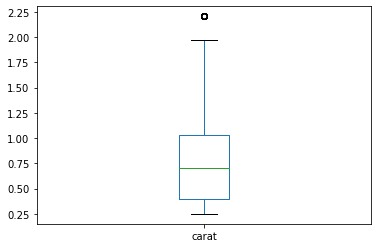

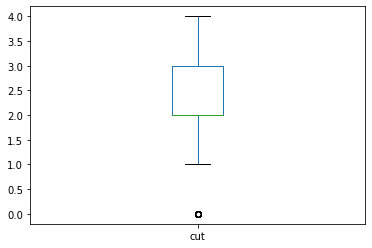

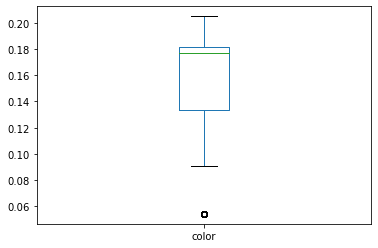

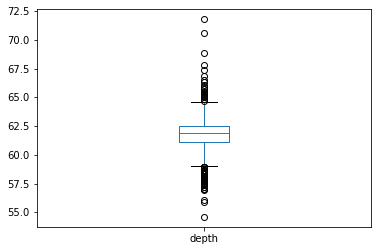

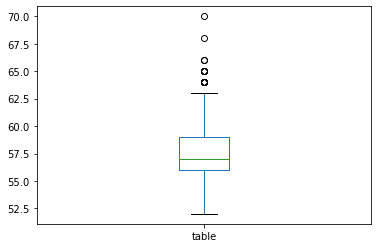

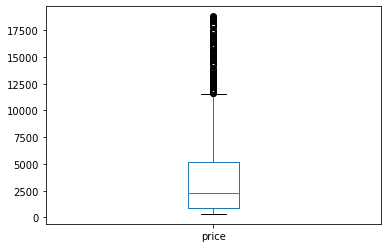

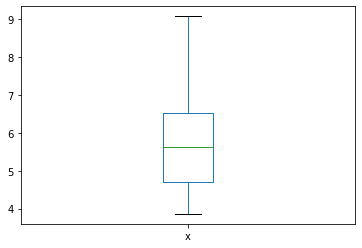

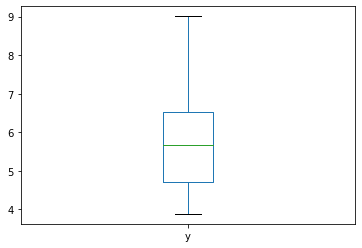

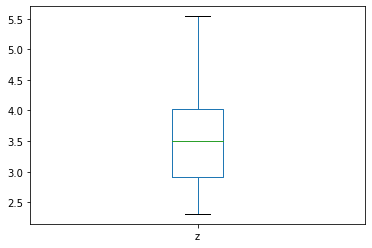

In [17]:
for i in data.columns:
    data[i].plot(kind = 'box')
    plt.show()

In [19]:
# to avoid outlier: capping is done

for i in data.columns:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    uc = data[i].quantile(0.99)
    lc = data[i].quantile(0.01)
    for j in data[i].index:
        if data.loc[j,i] > ub:
            data.loc[j,i] = uc
        if data.loc[j,i] < lc:
            data.loc[j,i] = lc

In [20]:
data.dtypes

carat    float64
cut        int32
color    float64
depth    float64
table    float64
price    float64
x        float64
y        float64
z        float64
dtype: object

In [ ]:
# Step1 : OLS model building

In [21]:
import scipy.stats as stats
import statsmodels.api as sm

In [22]:
inp = data.drop('price',axis=1)
out = data['price']

inpc = sm.add_constant(inp)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1209.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:30:00   Log-Likelihood:                -13740.
No. Observations:                1547   AIC:                         2.750e+04
Df Residuals:                    1538   BIC:                         2.755e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.062e+04   8234.117      1.290      0.197   -5526.434    2.68e+04
carat       1.469e+04    421.272     34.862      0.000    1.39e+04    1.55e+04
cut          104.5564     44.454      2.352      0.019      17.359     191.754
color       1.081e+04   1109.717      9.744      0.000    8636.079     1.3e+04
depth         20.7878    129.297      0.161      0.872    -232.829     274.404
table       -131.4217     22.040     -5.963      0.000    -174.654     -88.190
x          -3002.5660   1051.707     -2.855      0.004   -5065.496    -939.635
y           2439.9156   1001.236      2.437      0.015     475.984    4403.847
z          -3020.3962   2007.521     -1.505      0.133   -6958.163     917.371
==============================================================================
Omnibus:                      757.460   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8053.008
Skew:                           2.026   Prob(JB):                         0.00
Kurtosis:                      13.417   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
ols_mod.pvalues[ols_mod.pvalues < 0.05]

carat    1.004201e-196
cut       1.879859e-02
color     8.258574e-22
table     3.069436e-09
x         4.362152e-03
y         1.492632e-02
dtype: float64

In [ ]:
# inference:

# From the above model summary probability of fstats value is < 0.05. 
# Therefore we can conclude that, overall model is significant.

# from the tstat pvalue we can conclude, carat,color,table,y(width) and z(depth) are significant for predicting the target.

In [24]:
# Checking Assumptions:
# 1. Multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
inp1 = inp - inp.mean()

In [26]:
inp1c = sm.add_constant(inp1)

ols = sm.OLS(out,inp1c)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1209.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:30:11   Log-Likelihood:                -13740.
No. Observations:                1547   AIC:                         2.750e+04
Df Residuals:                    1538   BIC:                         2.755e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4165.9422     44.405     93.818      0.000    4078.842    4253.042
carat       1.469e+04    421.272     34.862      0.000    1.39e+04    1.55e+04
cut          104.5564     44.454      2.352      0.019      17.359     191.754
color       1.081e+04   1109.717      9.744      0.000    8636.079     1.3e+04
depth         20.7878    129.297      0.161      0.872    -232.829     274.404
table       -131.4217     22.040     -5.963      0.000    -174.654     -88.190
x          -3002.5660   1051.707     -2.855      0.004   -5065.496    -939.635
y           2439.9156   1001.236      2.437      0.015     475.984    4403.847
z          -3020.3962   2007.521     -1.505      0.133   -6958.163     917.371
==============================================================================
Omnibus:                      757.460   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8053.008
Skew:                           2.026   Prob(JB):                         0.00
Kurtosis:                      13.417   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp1c.values,i) for i in range(inp1c.shape[1])]
vif['Features'] = inp1c.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
8,979.738279,z
6,710.382098,x
7,632.445395,y
1,21.126486,carat
4,15.508356,depth
5,1.174343,table
2,1.061259,cut
3,1.052866,color
0,1.000000,const


In [28]:
inpv1 = inp1.drop('z',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['Features'] = inpv1.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
5,434.083114,x
6,426.591036,y
0,21.031578,carat
3,1.182843,depth
4,1.173740,table
1,1.059061,cut
2,1.052856,color


In [29]:
inpv2 = inpv1.drop('x',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['Features'] = inpv2.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
0,20.601468,carat
5,20.468513,y
3,1.182164,depth
4,1.146642,table
2,1.050601,color
1,1.037379,cut


In [30]:
inpv3 = inpv2.drop('carat',axis = 1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv3.values,i) for i in range(inpv3.shape[1])]
vif['Features'] = inpv3.columns
vif.sort_values('VIF',ascending = False)

,VIF,Features
3,1.142732,table
2,1.110344,depth
4,1.076368,y
1,1.041152,color
0,1.036926,cut


In [ ]:
# Inference : From the above vif iteration we can conclude that, "table","depth","y","color","cut" 
#             statisfying multicollinearity effect

In [31]:
# building model:

inpc = sm.add_constant(inpv3)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     946.4
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:30:25   Log-Likelihood:                -14190.
No. Observations:                1547   AIC:                         2.839e+04
Df Residuals:                    1541   BIC:                         2.842e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4165.9422     59.363     70.178      0.000    4049.502    4282.382
cut          106.7683     58.744      1.818      0.069      -8.458     221.995
color       6931.4531   1475.258      4.698      0.000    4037.727    9825.179
depth        133.2317     46.251      2.881      0.004      42.511     223.953
table       -104.5439     29.065     -3.597      0.000    -161.555     -47.532
y           3735.7481     55.219     67.653      0.000    3627.435    3844.061
==============================================================================
Omnibus:                      346.601   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.928
Skew:                           1.268   Prob(JB):                    4.73e-162
Kurtosis:                       5.258   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Assumption 2: Normality

ols_mod.resid.skew()

1.2689934329571848

<AxesSubplot:ylabel='Density'>

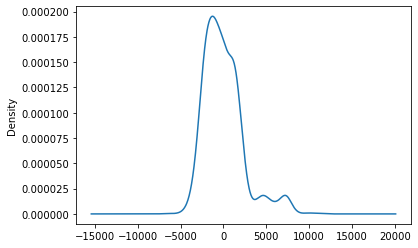

In [33]:
ols_mod.resid.plot(kind = 'density')

In [34]:
# inference: From the above plot and skew value, we can conclude that data is not normally distributed.

# Remedy: Transform the target column.

t1 = np.sqrt(data['price']).skew()

t2 = np.log(data['price']).skew()

t3 = np.power(data['price'],0.2).skew()

print(t1,t2,t3)

# by comparing three differnt transformation techniques, log transformation skewness is greatly reduced.

1.0699704200167117 0.2493422995511612 0.5655499368616728


In [35]:
data['price'] = np.log(data['price'])

out = data['price']
# check the normality and skewness:
inpc = sm.add_constant(inpv3)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     5000.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:30:34   Log-Likelihood:                -71.945
No. Observations:                1547   AIC:                             155.9
Df Residuals:                    1541   BIC:                             188.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7854      0.006   1205.654      0.000       7.773       7.798
cut            0.0012      0.006      0.191      0.849      -0.011       0.014
color          2.4827      0.160     15.471      0.000       2.168       2.797
depth          0.0320      0.005      6.368      0.000       0.022       0.042
table         -0.0072      0.003     -2.289      0.022      -0.013      -0.001
y              0.9320      0.006    155.158      0.000       0.920       0.944
==============================================================================
Omnibus:                       72.830   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.876
Skew:                           0.213   Prob(JB):                     1.31e-42
Kurtosis:                       4.676   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
ols_mod.resid.skew()

0.21365445968621835

<AxesSubplot:ylabel='Density'>

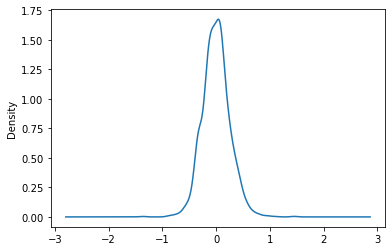

In [37]:
ols_mod.resid.plot(kind = 'density')

In [ ]:
# inference : model statisfy normality after transforming target variable. Skewness also reduced greatly.

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

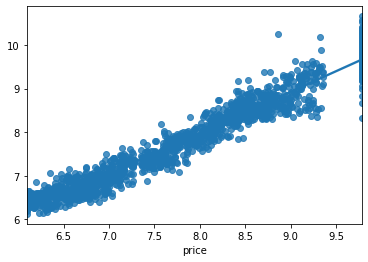

In [38]:
# Assumption 3: Linearity:

inpc = sm.add_constant(inpv3)

ypred = ols_mod.predict(inpc)
sns.regplot(out,ypred)

In [39]:
from statsmodels.stats.diagnostic import linear_rainbow

In [40]:
linear_rainbow(res = ols_mod, frac = 0.5)

(1.1361338321613272, 0.038370924113649806)

In [41]:
# Inference: Above model not statisfying linearity assumption. By Transforming input features we can try with linear regression.

In [42]:
inpv3.columns

Index(['cut', 'color', 'depth', 'table', 'y'], dtype='object')

In [43]:
p1 = data['cut'].skew()
p2 = data['color'].skew()
p3 = data['depth'].skew()
p4 = data['table'].skew()
p5 = data['y'].skew()

print(p1,p2,p3,p4,p5)

# inference: p2,p4 is more skewed. so applying transform to color and table alone and check for linearity by building model

-0.16775100983616362 -1.1029058703384766 -0.39162864629936295 0.5204089362871263 0.44118619851620533


In [57]:
yy,lam=stats.boxcox(data['y'])
print(pd.DataFrame(yy).skew())

data['y'] = yy

0    0.034548
dtype: float64


In [54]:
dep,lam=stats.boxcox(data['depth'])
print(pd.DataFrame(dep).skew())

data['depth'] = dep

0    0.031855
dtype: float64


In [50]:
t1 = np.sqrt(data['color']).skew()
t2 = np.log(data['color']).skew()
t3 = np.power(data['color'],0.9).skew()
t4,lam=stats.boxcox(data['color'])
print(pd.DataFrame(t4).skew())
print(t1,t2,t3)

data['color'] = t4
data['color']
# inference: Boxcon method is used to reduced skewness in the feature vairable "color"

0   -0.349709
dtype: float64
-1.4242236460869337 -1.7804309327205647 -1.1641659094393004


0      -0.395057
1      -0.396391
2      -0.400086
3      -0.394712
4      -0.397761
          ...   
1542   -0.394712
1543   -0.392726
1544   -0.400086
1545   -0.396391
1546   -0.392726
Name: color, Length: 1547, dtype: float64

In [51]:
t1 = np.sqrt(data['table']).skew()
t2 = np.log(data['table']).skew()
t3 = np.power(data['table'],0.9).skew()
t4,lam=stats.boxcox(data['table'])
print(pd.DataFrame(t4).skew())
print(t1,t2,t3)
data['table'] = t4
data['table']
# inference: Boxcon method is used to reduced skewness greatly in the feature vairable "table"

0    0.0
dtype: float64
0.469335541712929 0.41880628827405225 0.5101495227889928


0       0.241486
1       0.241486
2       0.241486
3       0.241486
4       0.241486
          ...   
1542    0.241486
1543    0.241486
1544    0.241486
1545    0.241486
1546    0.241486
Name: table, Length: 1547, dtype: float64

In [61]:
data.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,1,-0.395057,1.924936e+09,0.241486,6.525030,4.29,1.053453,2.63
1,0.72,2,-0.396391,2.089745e+09,0.241486,7.800982,5.80,1.185763,3.58
2,1.71,3,-0.400086,2.265980e+09,0.241486,9.087947,7.64,1.298970,4.79
3,1.01,3,-0.394712,1.611907e+09,0.241486,8.893847,6.67,1.244479,3.93
4,0.52,2,-0.397761,2.225799e+09,0.241486,7.450080,5.17,1.136482,3.23


In [62]:
inp = data.drop('price',axis = 1)
out = data['price']

inpc = sm.add_constant(inp)

ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3743.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:48:20   Log-Likelihood:                -36.763
No. Observations:                1547   AIC:                             89.53
Df Residuals:                    1539   BIC:                             132.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7570      1.312     10.483      0.000      11.183      16.331
carat         -0.1770      0.118     -1.501      0.134      -0.408       0.054
cut            0.0040      0.006      0.638      0.524      -0.008       0.016
color         37.8064      2.891     13.076      0.000      32.135      43.478
depth      -1.927e-10   8.92e-11     -2.161      0.031   -3.68e-10   -1.78e-11
table          3.3221      0.317     10.483      0.000       2.701       3.944
x             -0.0016      0.141     -0.012      0.991      -0.278       0.275
y              4.0525      1.057      3.835      0.000       1.979       6.126
z              1.1266      0.272      4.137      0.000       0.592       1.661
==============================================================================
Omnibus:                       69.371   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.727
Skew:                           0.337   Prob(JB):                     5.00e-28
Kurtosis:                       4.224   Cond. No.                     1.19e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.66e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
# To check Linearity:
linear_rainbow(res = ols_mod, frac = 0.5)

(1.1478283007482473, 0.02803671370926272)

In [ ]:
# After doing transformation also above ols model is not statisfying Linearity Check.
# So this dataset is not suitable for Linear Regression Model.